<h1>Final Project - MDdDM</h1>
<h3>As the final project, we must create a segmentation aiming to target insurances customers based on the K-Means clustering method</h3>

<p>Nickolas Lago - 03/11/2020 - First Commit - V_0.01</p>

<h3>Project Description</h3>
As a Data Mining/Analytic Consultant, you are asked develop a Customer Segmentation in such a way that it will be possible for the Marketing Department to better understand all the different Customers’ Profiles.

You are expected to define, describe and explain the clusters you chose. Invest time in reasoning how you want to do your clustering, possible approaches, and advantages or disadvantages of different decisions. Simultaneous, you should express the marketing approach you recommend for each cluster. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Data Import and Understanding</h2>

In [3]:
df = pd.read_sas('a2z_insurance.sas7bdat')

df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [5]:
df['EducDeg'].unique()

array([b'2 - High School', b'1 - Basic', b'3 - BSc/MSc', b'4 - PhD', nan],
      dtype=object)

In [6]:
# Summary statistics for all variables
summary=df.describe(include='all')
summary=summary.transpose()
summary.head(len(summary))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296,NaN,NaN,NaN,5148.5,2972.34,1,2574.75,5148.5,7722.25,10296
FirstPolYear,10266,NaN,NaN,NaN,1991.06,511.268,1974,1980,1986,1992,53784
BirthYear,10279,NaN,NaN,NaN,1968.01,19.7095,1028,1953,1968,1983,2001
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260,NaN,NaN,NaN,2506.67,1157.45,333,1706,2501.5,3290.25,55215
GeoLivArea,10295,NaN,NaN,NaN,2.70986,1.26629,1,1,3,4,4
Children,10275,NaN,NaN,NaN,0.706764,0.455268,0,0,1,1,1
CustMonVal,10296,NaN,NaN,NaN,177.893,1945.81,-165680,-9.44,186.87,399.778,11875.9
ClaimsRate,10296,NaN,NaN,NaN,0.742772,2.91696,0,0.39,0.72,0.98,256.2
PremMotor,10262,NaN,NaN,NaN,300.47,211.915,-4.11,190.59,298.61,408.3,11604.4


In [7]:
# Check missing values
print(df.isnull().sum())

CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64


<h2>Finding and Dealing with Outliers</h2>

Before removing NaN values, we will deal with the Outliers in order to be able to use the data base mean later without overestimating the values.

Source: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

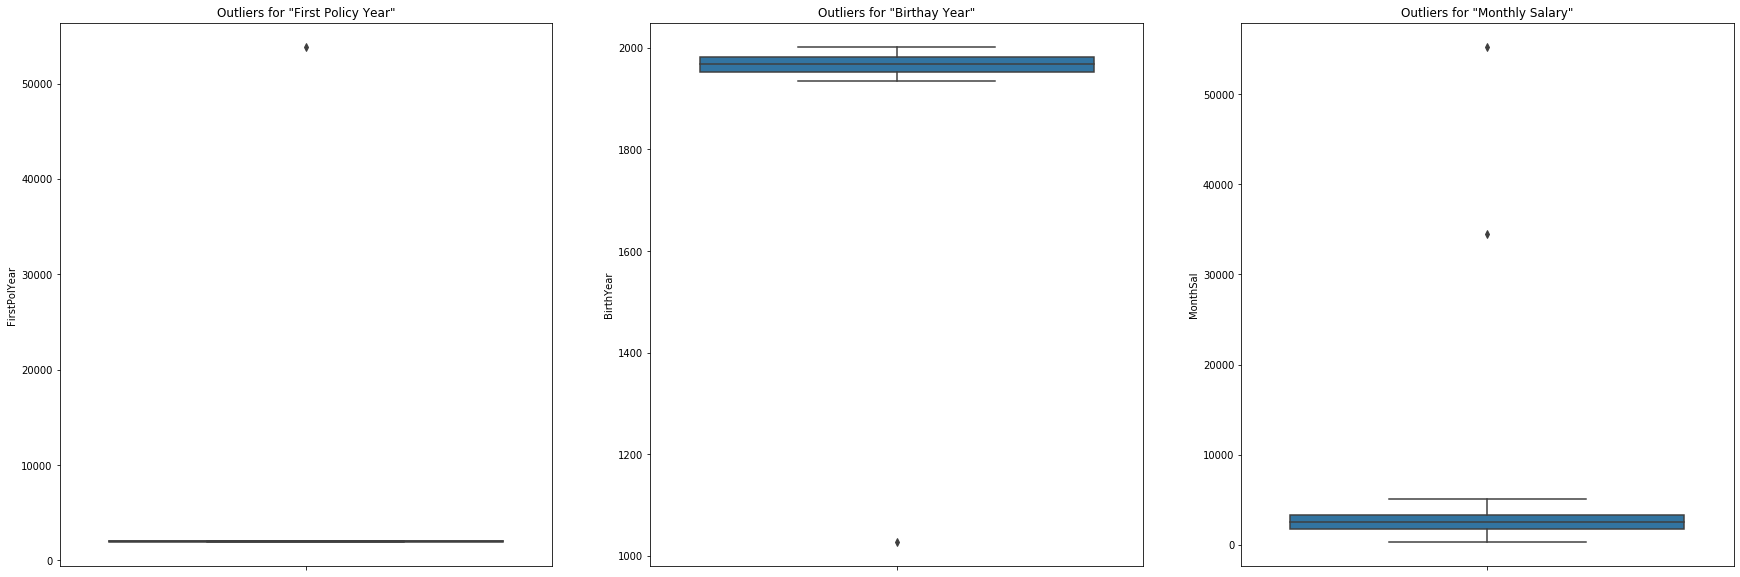

In [20]:
#Visualizing Outliers:

plt.figure(figsize=(30,10))

plt.subplot(1,3,1)
sns.boxplot(y='FirstPolYear', data=df)
plt.title('Outliers for "First Policy Year"')

plt.subplot(1,3,2)
sns.boxplot(y='BirthYear', data=df)
plt.title('Outliers for "Birthay Year"')

plt.subplot(1,3,3)
sns.boxplot(y='MonthSal', data=df)
plt.title('Outliers for "Monthly Salary"')

plt.show()

In [32]:
#See where we find the outliers from the three colums selected
out_cols = ['FirstPolYear', 'BirthYear', 'MonthSal']

outliers = df[out_cols].describe()
outliers = outliers.transpose()
outliers.head(len(summary))

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.00,53784.0
BirthYear,10279.0,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.00,2001.0
MonthSal,10260.0,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0


<h3>Outliers Analysis</h3>

By analysing the three colums we could see that <b>FirstPolYear</b> and <b>Birthday Year</b> had outliers that were probably miss filling values. On the other hand, although it were detected outliers in <b>MonthSal</b>, we opted to not deleted in order to understand the true value of these users.

In [117]:
df['EducDeg'].value_counts()

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
Name: EducDeg, dtype: int64

In [119]:
#Trying to see if we could fill the missing values with some mean from another dimension
print(df.groupby(['EducDeg'])['GeoLivArea'].mean())

EducDeg
b'1 - Basic'          2.714623
b'2 - High School'    2.736752
b'3 - BSc/MSc'        2.697229
b'4 - PhD'            2.657102
Name: GeoLivArea, dtype: float64


<h2>Dealing with NaN Values</h2>

In [ ]:
#Deletando as rows que tem valores faltando para Children, EducDeg e GeoLivArea
cols = ['GeoLivArea','Children','EducDeg']
df_test = df.dropna(axis=0, how='any',subset=cols)

print(df_test.isna().sum())
print(df_test.shape)

By dropping the NaN values in the columns ('GeoLivArea','Children','EducDeg') we will loose only 0,4% of our Data Base. It could be useful to use the model to cluster the other 97% and deal with the rest 

Support links:

http://towardsdatascience.com/handling-missing-values-with-pandas-b876bf6f008f

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [125]:
df_test['MonthSal'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.999])

count    10223.000000
mean      2506.062213
std       1158.155554
min        333.000000
10%       1175.000000
25%       1705.000000
50%       2500.000000
75%       3290.000000
90%       3823.000000
99.9%     4866.336000
max      55215.000000
Name: MonthSal, dtype: float64

In [126]:
df_test['MonthSal'].mean()

2506.0622126577327

In [ ]:
#Now, lets try to fill the other missing values with their means

#For salary and ages, we will use the means for each column, and for the First Policy Year, we will use the value just before to fill the 

mean = round(df_test['MonthSal'].mean())
print(mean)
df_test['MonthSal'].fillna(mean, inplace=True)

In [ ]:
df_test.isna().sum()

In [ ]:
#Replacing bday year by the round of the bday year mean.
bDay_mean = round(df_test['BirthYear'].mean())
print(bDay_mean)
df_test['BirthYear'].fillna(bDay_mean, inplace=True)
print(df_test.isna().sum())

In [ ]:
#Found an error for the First Policy Year -> Outlier
df_test['FirstPolYear'].describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.995])